# Basic classification: Classify images of clothing

In [12]:
# import TensorFlow (keras included by default with TesnorFlow)
import tensorflow as tf

# import supporting libraries
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Check the version of TensorFlow
tf.__version__

'2.4.1'

### Import the Fashion MNIST dataset

The Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

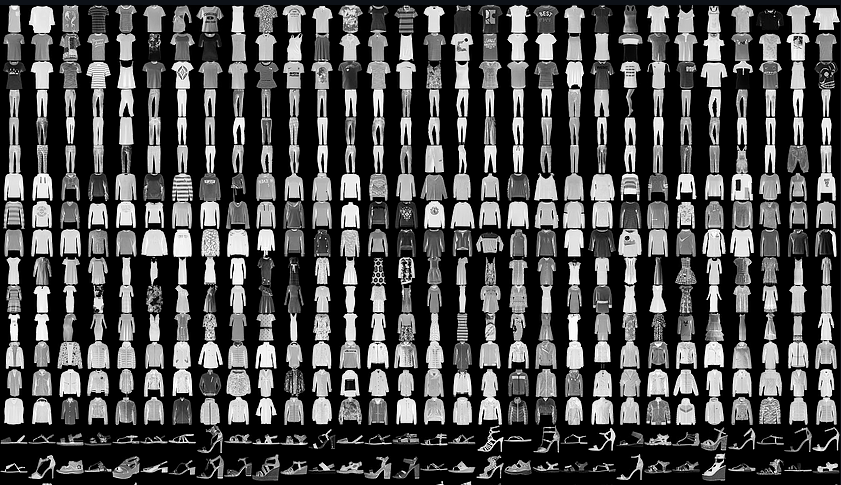

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.
* The model is tested against the test set, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

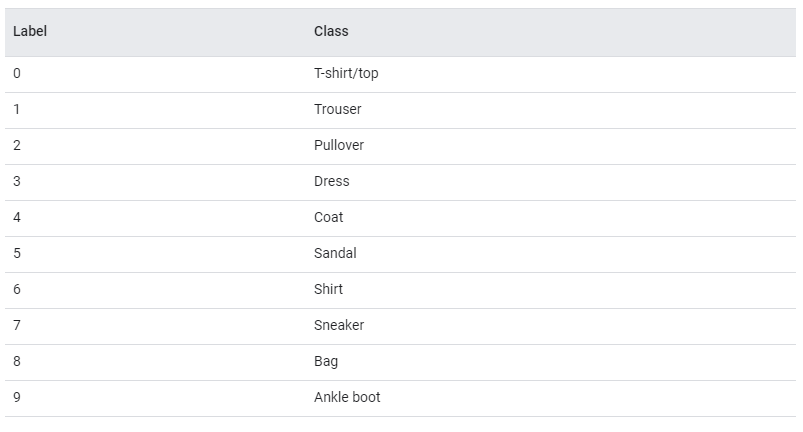

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [15]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [16]:
training_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [17]:
training_labels.shape

(60000,)

In [18]:
len(training_labels)

60000

Each label is an integer between 0 and 9:

In [19]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [20]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

### Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

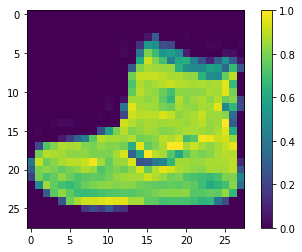

In [22]:
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [4]:
# Normalize your data
training_images = training_images/255.0
test_images = test_images/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

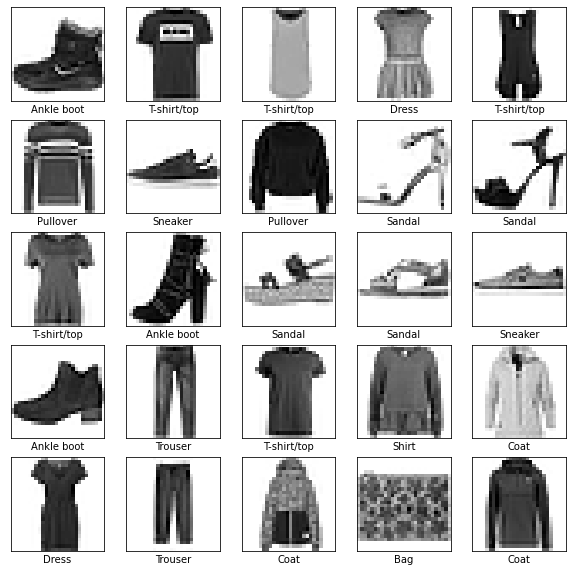

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

## Architecture

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(), # Flatten() converts n-dimensional array into 1-dimensional array.
                            tf.keras.layers.Dense(512, activation = tf.nn.relu),
                            tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compilation Step

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `training_images` and `training_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

#### Feed the model

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [25]:
model.fit(training_images, training_labels, epochs=10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2721 - accuracy: 0.8996
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2573 - accuracy: 0.9052
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2457 - accuracy: 0.9090
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2331 - accuracy: 0.9145
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2255 - accuracy: 0.9168
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2151 - accuracy: 0.9206
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2082 - accuracy: 0.9225
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2013 - accuracy: 0.9255
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1960 - accuracy: 0.9271
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1874 - accuracy: 0.9302

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.93 (or 93%) on the training data.

## Evaluation Step

Next, compare how the model performs on the test dataset:

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)


313/313 - 0s - loss: 0.3267 - accuracy: 0.8929
